In [1]:
# Data manipulation
import pandas as pd
import numpy as np

import cleaning
import eda
import utils

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Import this to silence a warning when converting data column of a dataframe on the fly
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

---
## Loading data & first look

In [2]:
df = utils.read_csv(years=["2014", "2015", "2016", "2017", "2018"])

In [3]:
df[["Stock", "Sector", "Class"]] = df[["Stock", "Sector", "Class"]].astype("category")

In [4]:
df.head()

# Get info about dataset
df.info()

# Describe dataset variables
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22077 entries, 0 to 22076
Columns: 226 entries, Stock to Year
dtypes: category(3), float64(222), int64(1)
memory usage: 37.8 MB


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,PRICE VAR [%],Year
count,2.090600e+04,19989.000000,2.030600e+04,2.087000e+04,1.993900e+04,2.040800e+04,2.037500e+04,2.097600e+04,2.035800e+04,2.071300e+04,...,18264.000000,19952.000000,19650.000000,19690.000000,19213.000000,19462.000000,19598.000000,19655.000000,2.207700e+04,22077.000000
mean,5.161619e+09,3.622214,3.258565e+09,1.970452e+09,1.033333e+08,8.699279e+08,1.368670e+09,5.896979e+08,9.778939e+07,4.925003e+08,...,0.012298,10.978239,0.158858,1.134221,0.783208,3.733922,0.295610,0.365149,2.698893e+02,2016.090954
std,3.197314e+10,312.648170,2.583092e+10,8.735750e+09,7.676062e+08,3.804283e+09,5.662984e+09,2.976454e+09,4.996543e+08,2.484345e+09,...,0.263079,1101.098165,3.268154,45.381079,66.524006,174.864701,12.974127,15.030054,1.934617e+04,1.374340
min,-6.276160e+08,-12.769300,-2.986888e+09,-1.280800e+10,-1.098000e+08,-1.401594e+08,-5.495512e+09,-1.933900e+10,-1.710954e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-1.000000,-3963.131200,-1.051000,-2.662200,-2.369900,-1.003972e+02,2014.000000
25%,5.880737e+07,-0.014700,3.211750e+06,3.035575e+07,0.000000e+00,1.768550e+07,3.564150e+07,-4.433750e+06,0.000000e+00,-8.745000e+06,...,0.000000,-0.051125,0.000000,-0.031075,-0.103800,-0.067475,0.000000,-0.013700,-1.947409e+01,2015.000000
50%,4.352510e+08,0.057600,1.530115e+08,1.943525e+08,0.000000e+00,8.062450e+07,1.564000e+08,3.585350e+07,3.697000e+06,2.380000e+07,...,0.000000,0.009500,0.000000,0.048000,0.032400,0.000000,0.000000,0.061000,3.909087e+00,2016.000000
75%,2.287259e+09,0.182400,1.180224e+09,8.806035e+08,1.220150e+07,3.699722e+08,6.210870e+08,2.554363e+08,4.969325e+07,1.964680e+08,...,0.040000,0.200550,0.058400,0.176800,0.142100,0.150075,0.000000,0.185350,2.750567e+01,2017.000000
max,1.886894e+12,42138.663900,1.581527e+12,4.621600e+11,2.883700e+10,1.856830e+11,3.056050e+11,1.565540e+11,3.152300e+10,8.720500e+10,...,5.400500,153332.333300,293.473000,5468.426400,7039.325900,17646.823500,1542.611000,2042.000000,2.418601e+06,2018.000000


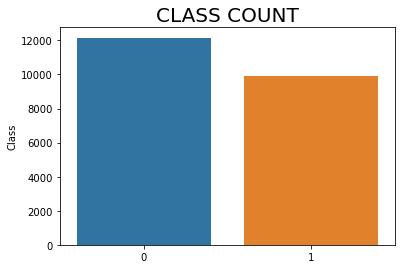

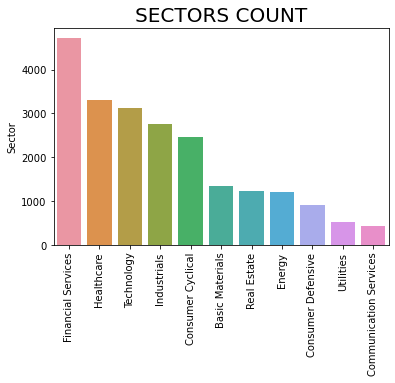

In [5]:
# Plot class distribution
df_class = df['Class'].value_counts()
sns.barplot(np.arange(len(df_class)), df_class)
plt.title('CLASS COUNT', fontsize=20)
plt.show()

# Plot sector distribution
df_sector = df['Sector'].value_counts()
sns.barplot(np.arange(len(df_sector)), df_sector)
plt.xticks(np.arange(len(df_sector)), df_sector.index.values.tolist(), rotation=90)
plt.title('SECTORS COUNT', fontsize=20)
plt.show()

---
## Inorganic stocks

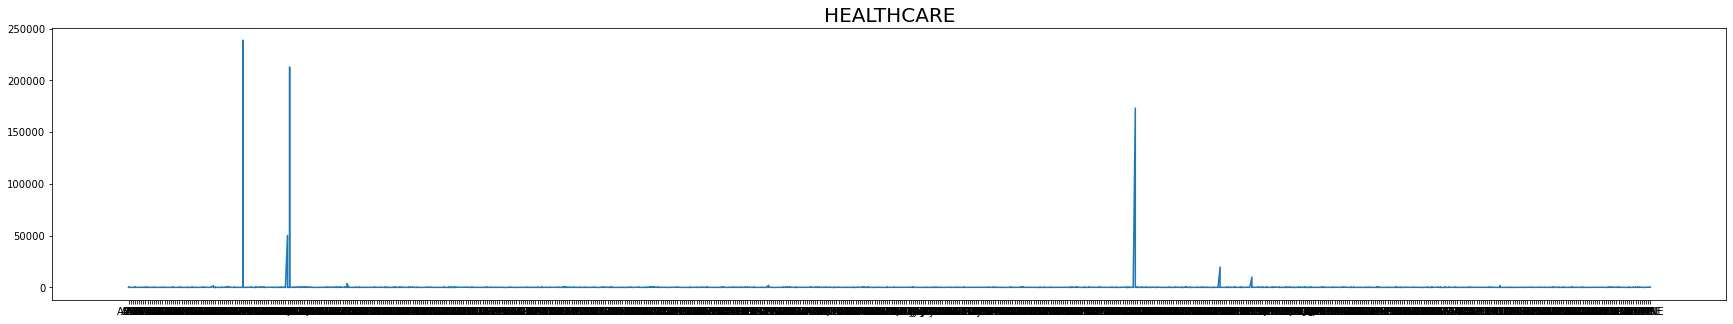

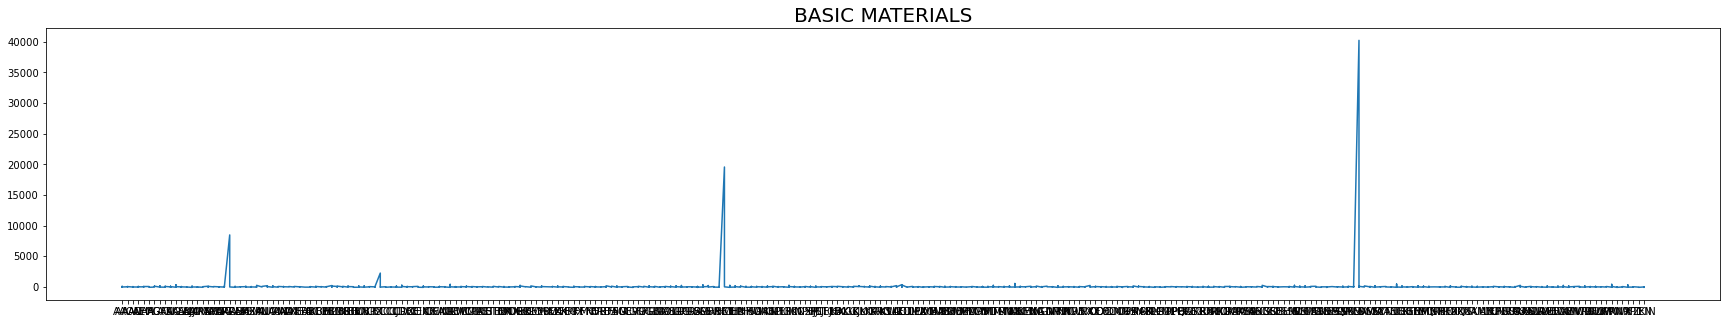

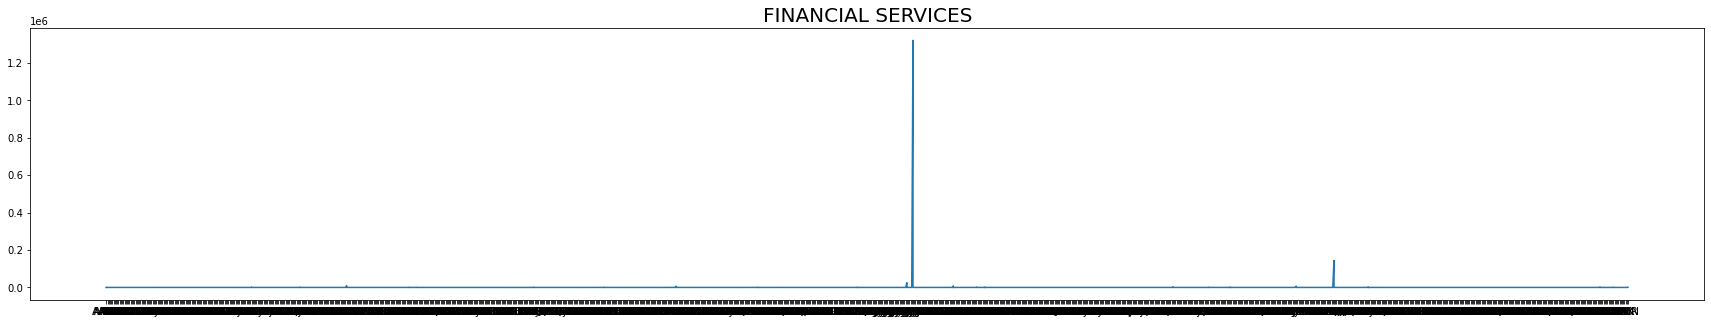

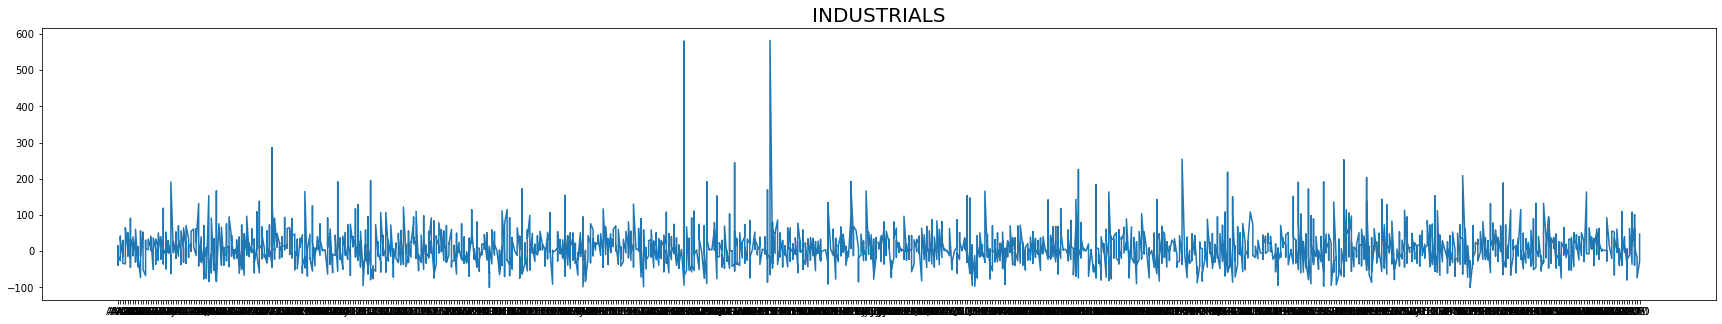

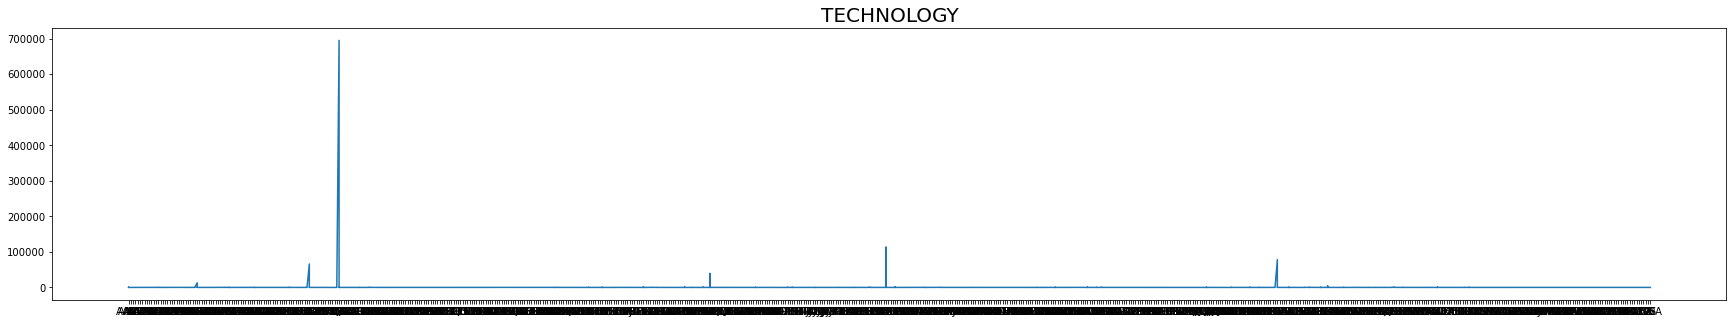

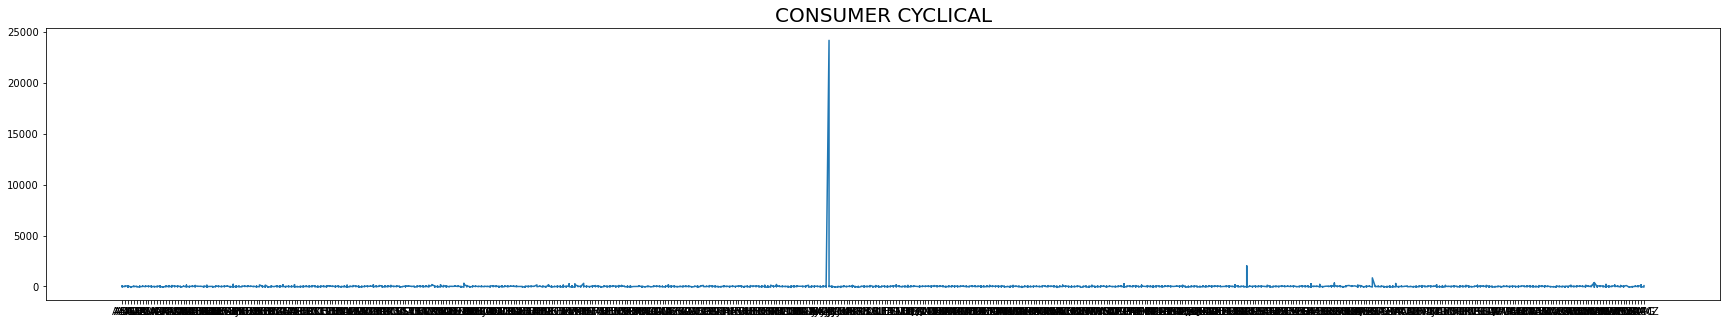

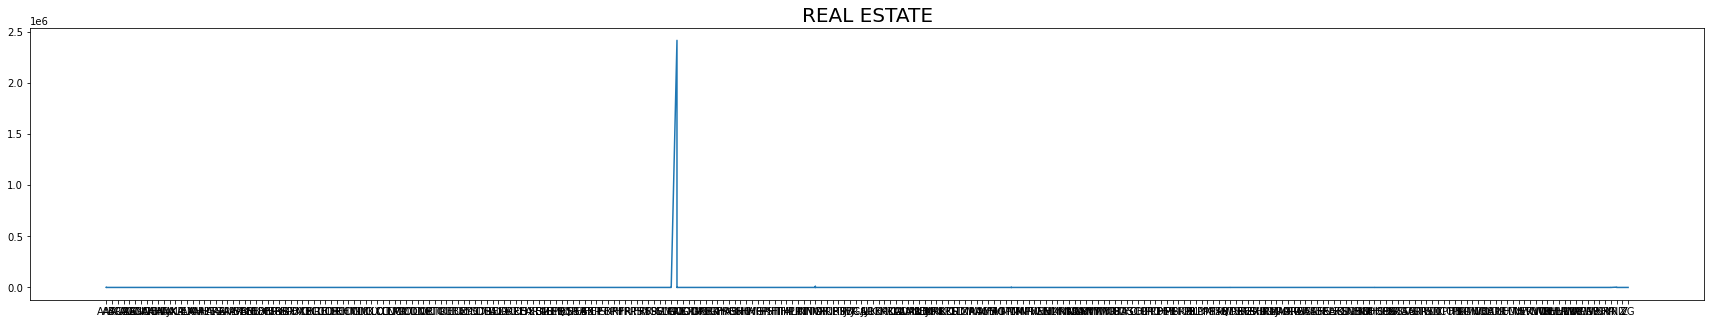

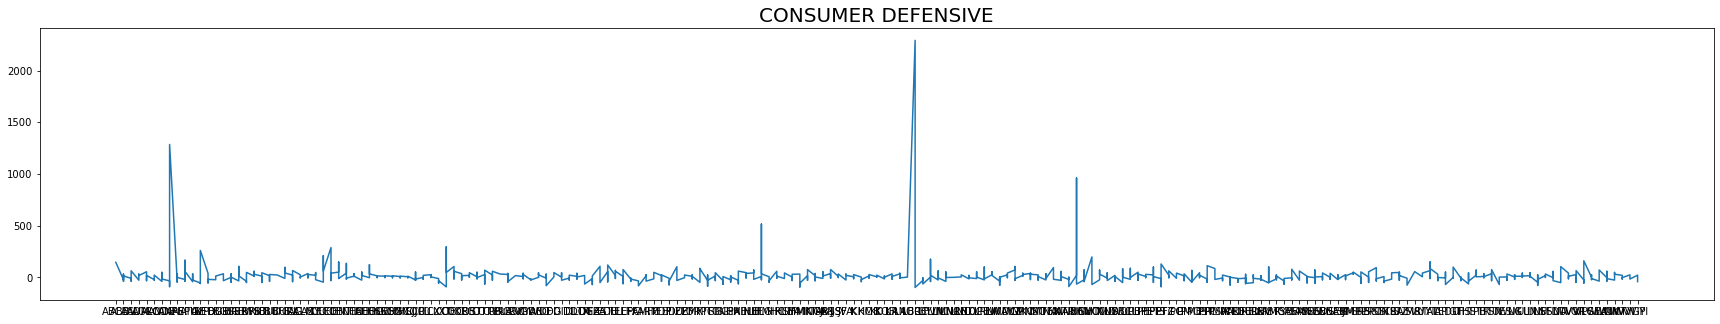

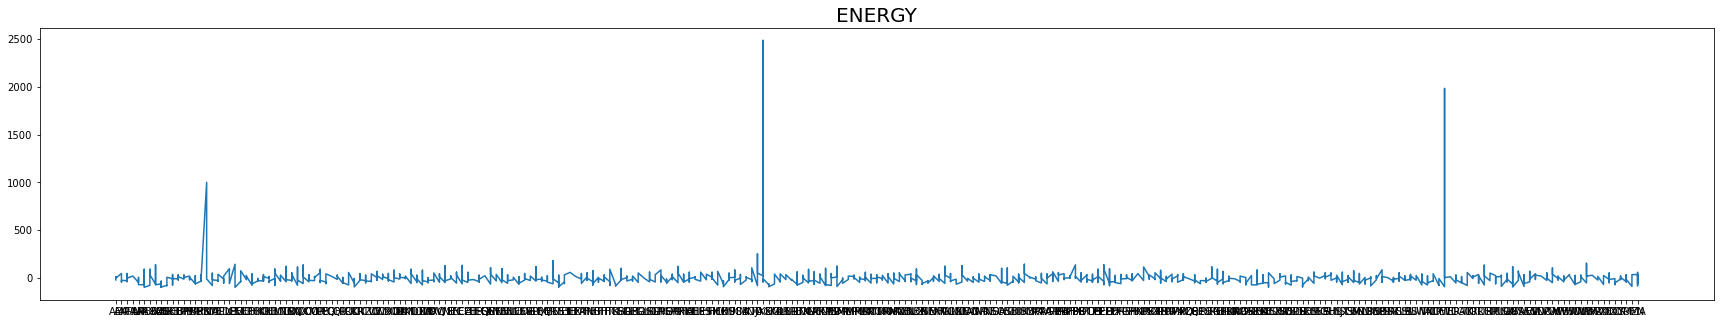

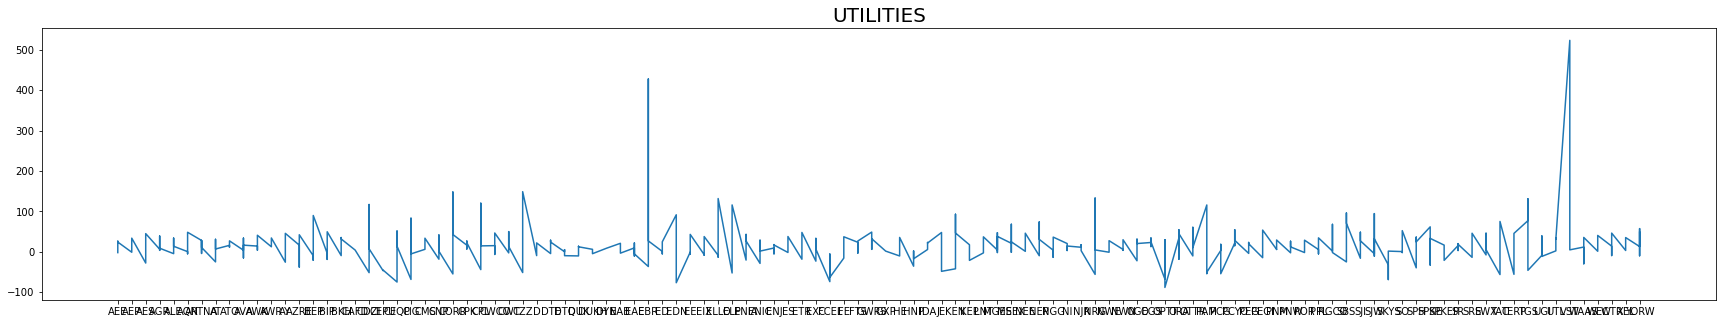

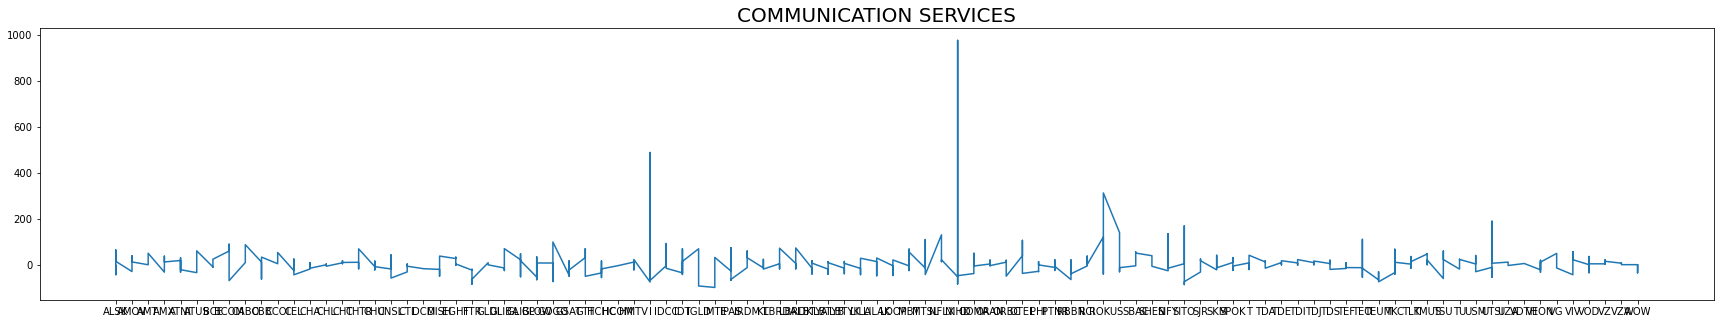

In [6]:
eda.plot_price_variation_per_sector(df)

In [7]:
df = cleaning.remove_inorganic_stocks(df, gain=500)

64 STOCKS with more than 500% gain.
Removed 290 entries.


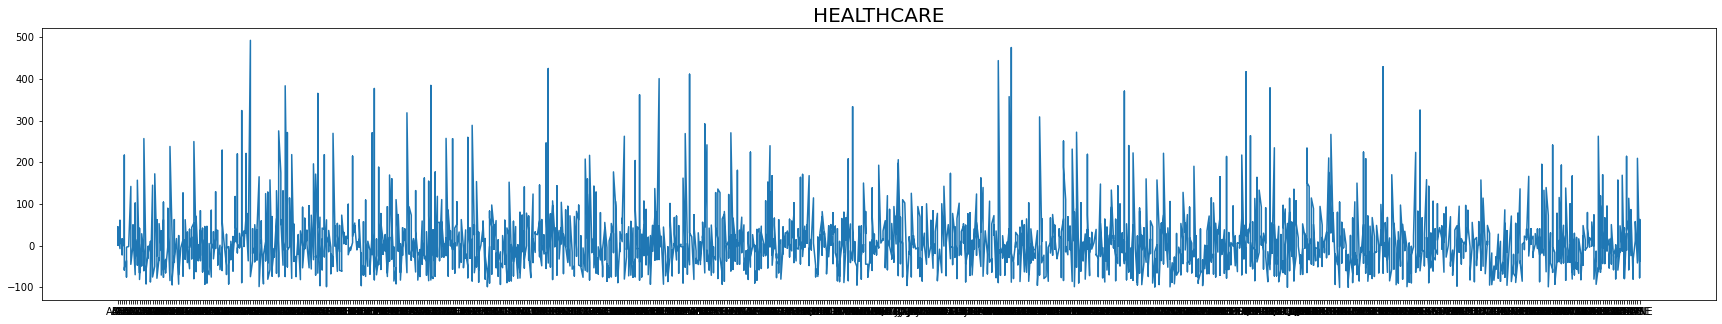

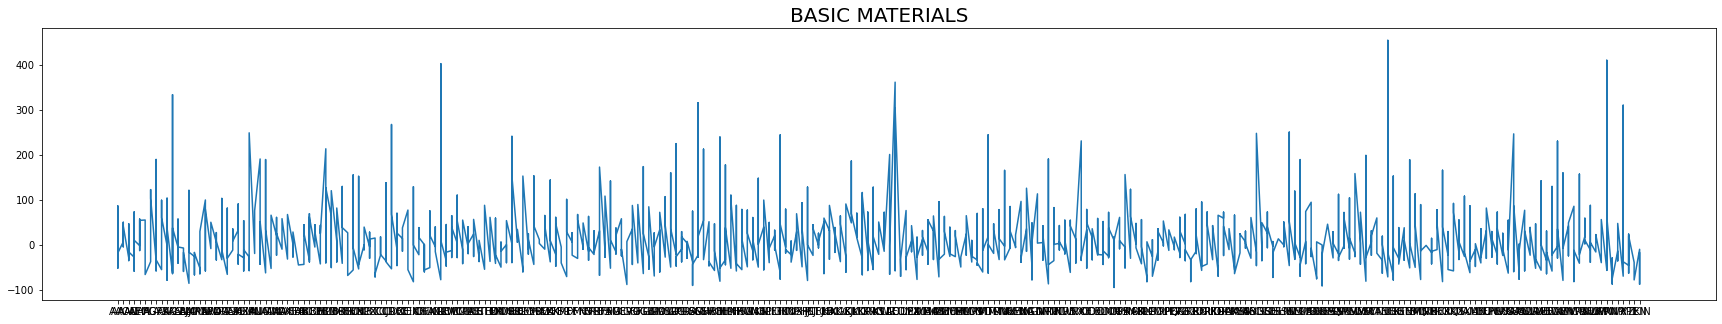

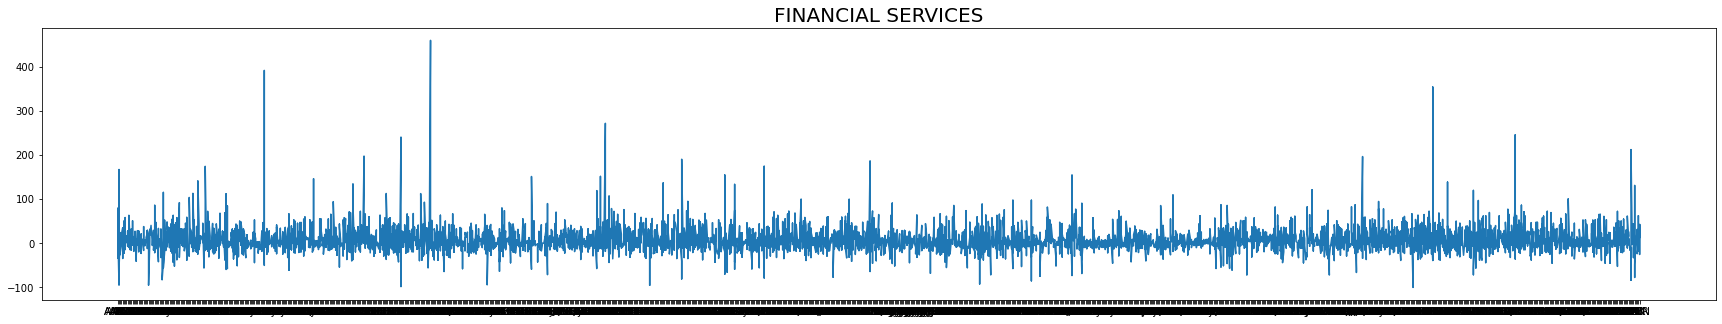

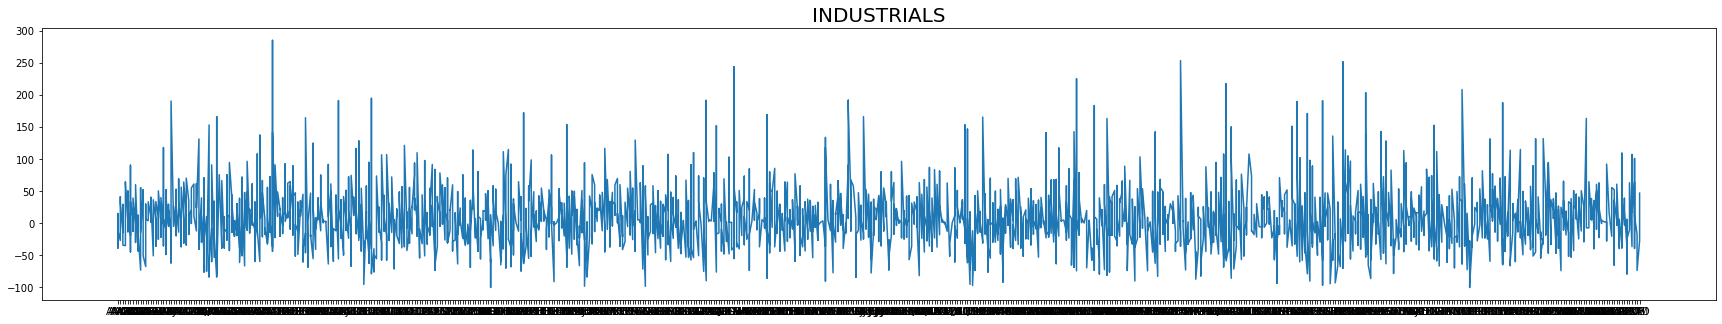

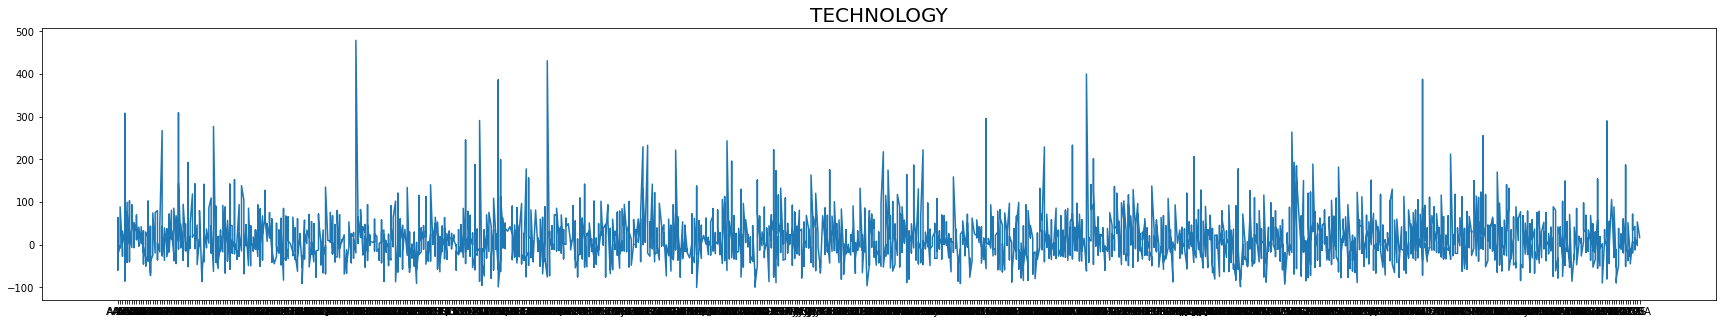

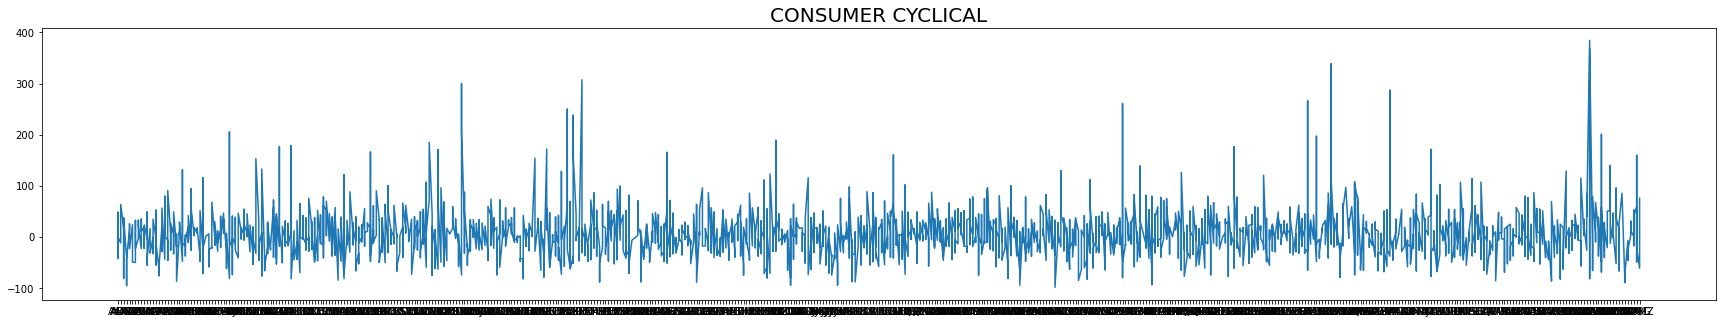

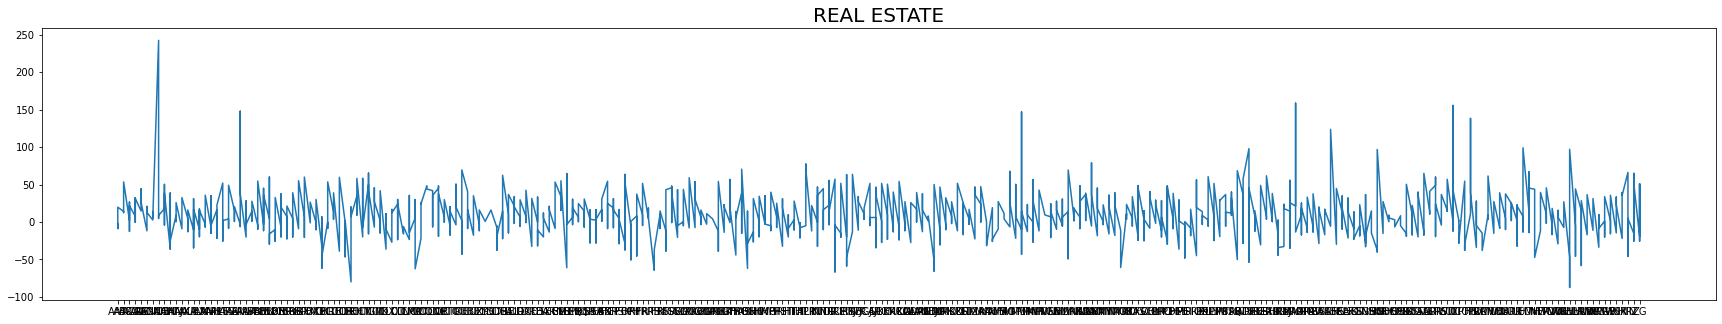

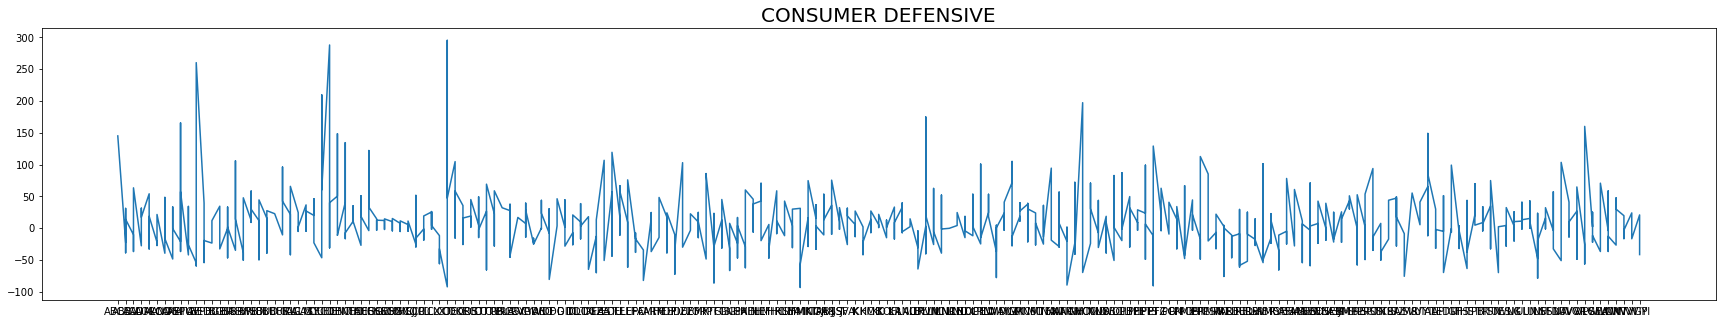

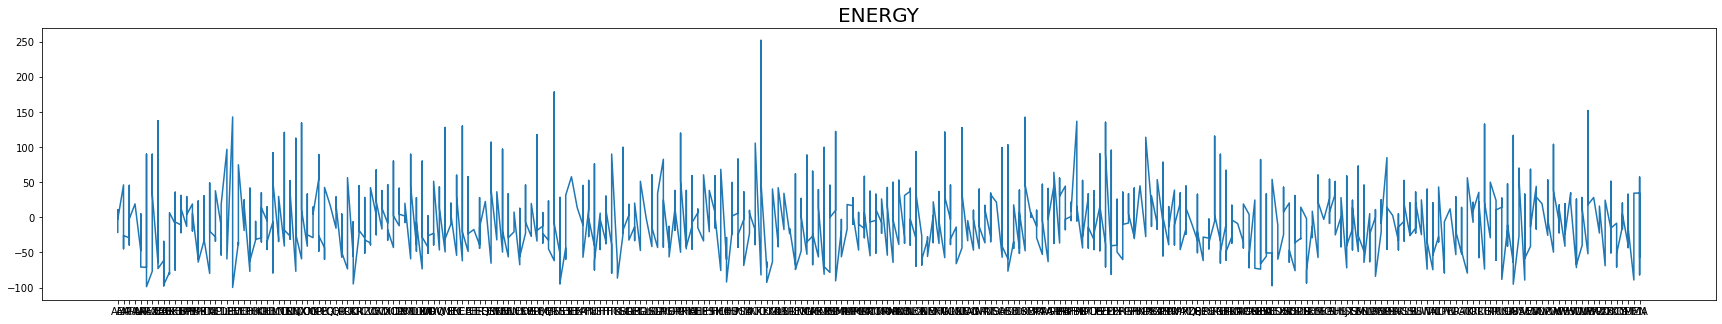

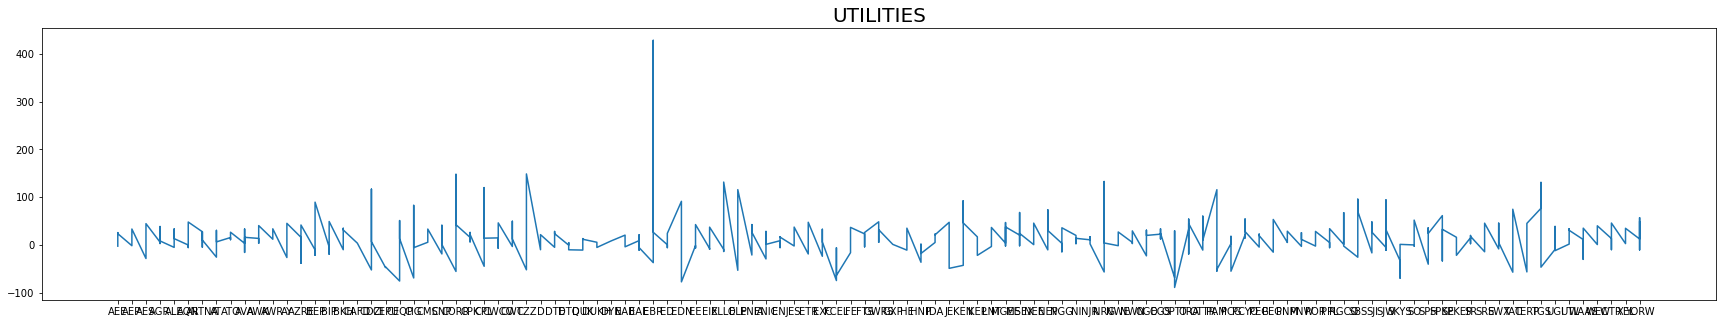

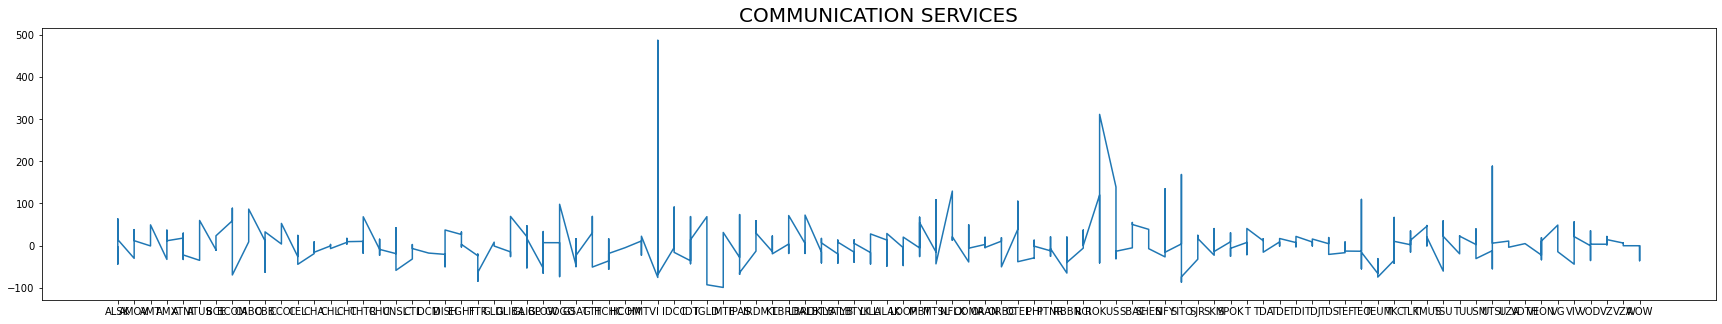

In [8]:
eda.plot_price_variation_per_sector(df)

---
## NaN-Values

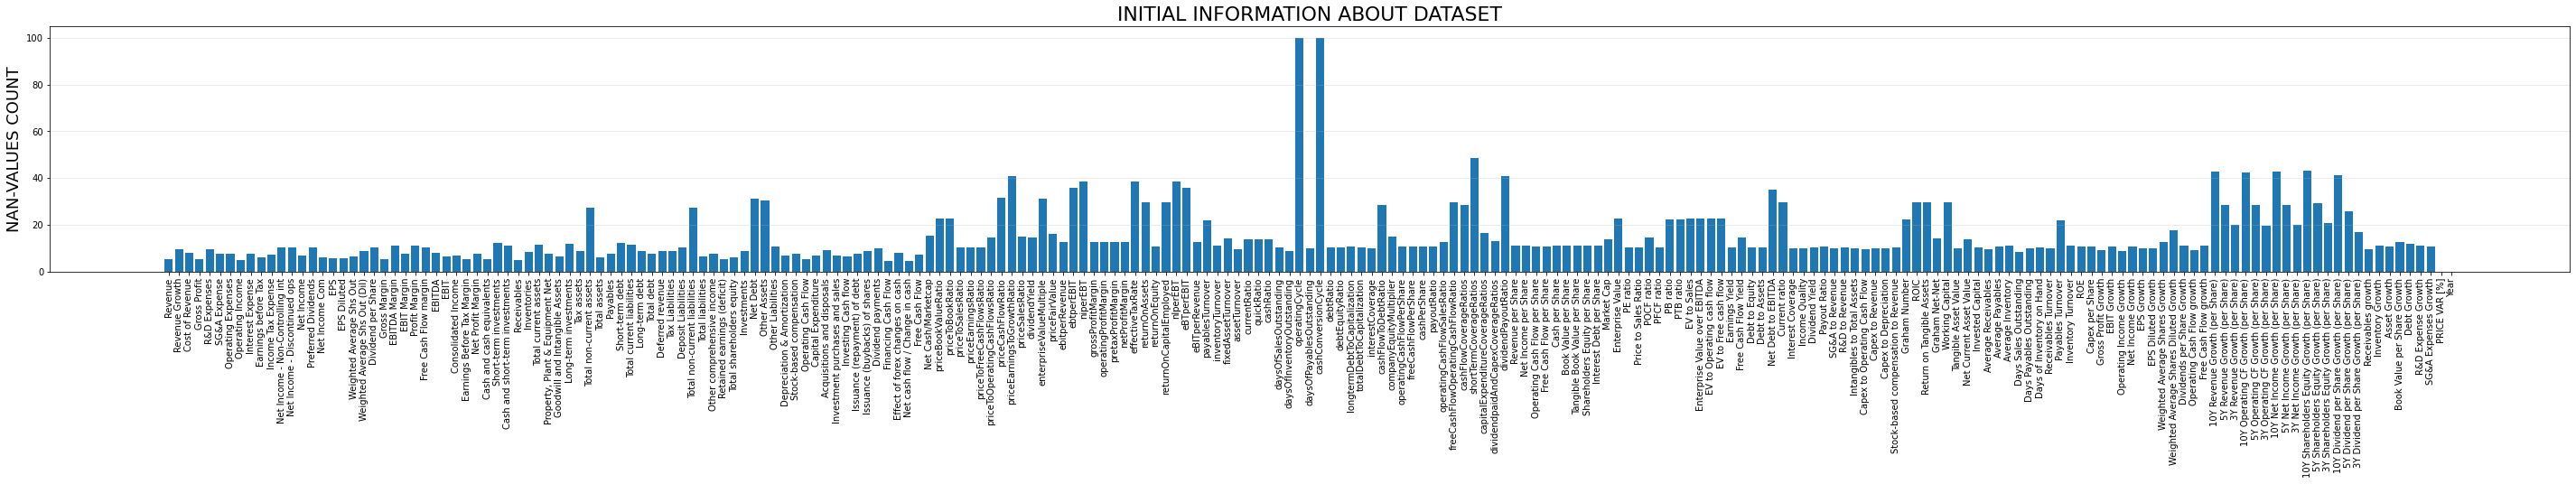

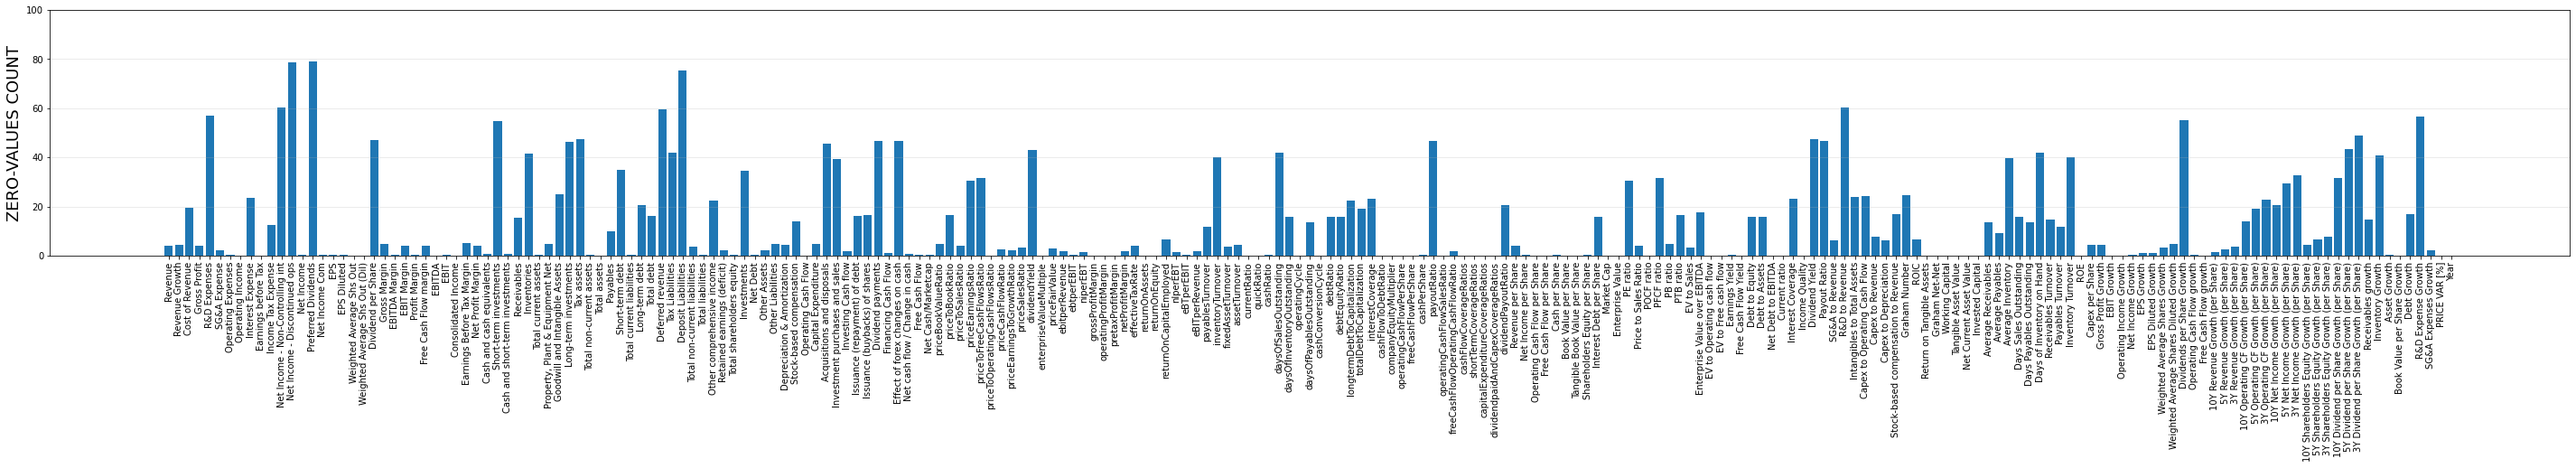

In [9]:
# Plot initial status of data quality in terms of nan-values and zero-values
nan_vals = df.select_dtypes(include="number").isna().sum()
zero_vals = df.select_dtypes(include="number").isin([0]).sum()
ind = np.arange(df.select_dtypes(include="number").shape[1])

plt.figure(figsize=(50,5))
plt.title('INITIAL INFORMATION ABOUT DATASET', fontsize=22)
plt.bar(ind, nan_vals.values / df.shape[0] * 100)
plt.xticks(ind, nan_vals.index.values, rotation='90')
plt.ylabel('NAN-VALUES COUNT', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

plt.figure(figsize=(50,5))
plt.bar(ind, zero_vals.values / df.shape[0] * 100)
plt.ylabel('ZERO-VALUES COUNT', fontsize=18)
plt.xticks(ind, nan_vals.index.values, rotation='90')
plt.yticks([0, 20, 40, 60, 80, 100])
plt.grid(alpha=0.3, axis='y')
plt.show()

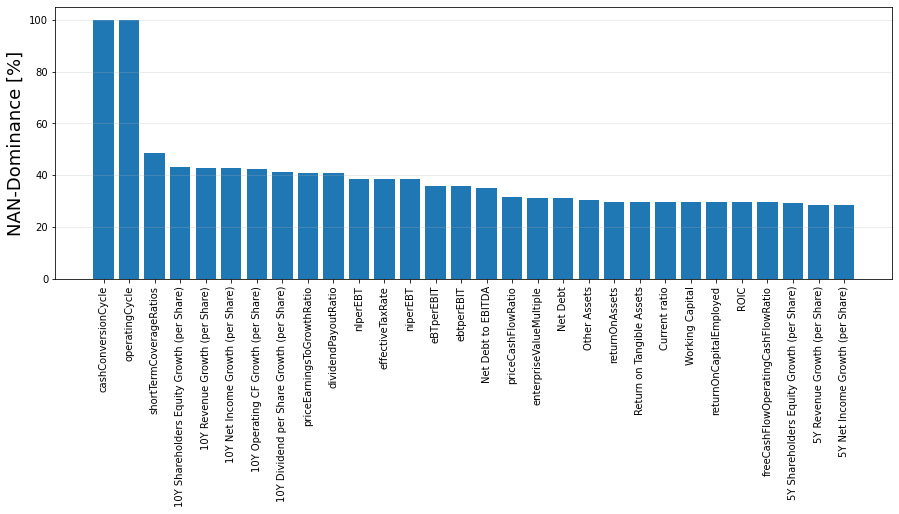

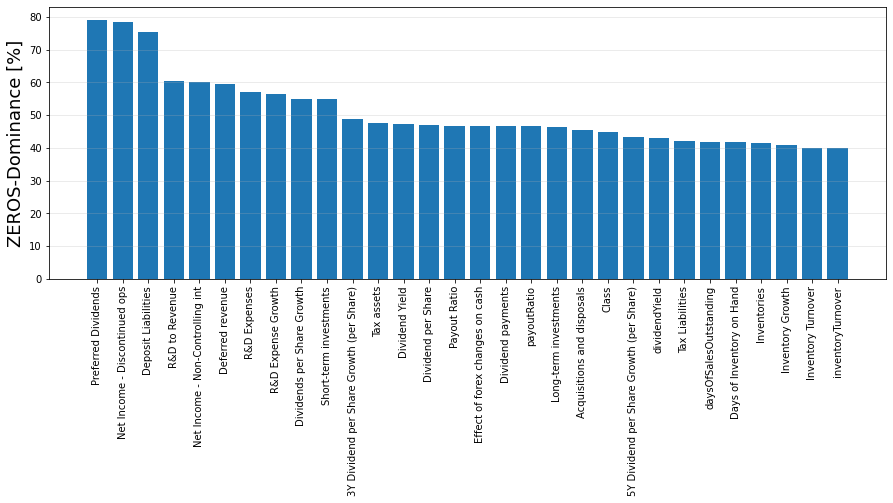

In [10]:
# Find count and percent of nan-values, zero-values
total_nans = df.isnull().sum().sort_values(ascending=False)
percent_nans = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
total_zeros = df.isin([0]).sum().sort_values(ascending=False)
percent_zeros = (df.isin([0]).sum()/df.isin([0]).count() * 100).sort_values(ascending=False)
df_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Percent NaN'])
df_zeros = pd.concat([total_zeros, percent_zeros], axis=1, keys=['Total Zeros', 'Percent Zeros'])

# Graphical representation
plt.figure(figsize=(15,5))
plt.bar(np.arange(30), df_nans['Percent NaN'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), df_nans['Percent NaN'].iloc[:30].index.values.tolist(), rotation='90')
plt.ylabel('NAN-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(np.arange(30), df_zeros['Percent Zeros'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), df_zeros['Percent Zeros'].iloc[:30].index.values.tolist(), rotation='90')
plt.ylabel('ZEROS-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

In [11]:
# Find reasonable threshold for nan-values situation
test_nan_level = 0.5
print(df_nans.quantile(test_nan_level))
_, thresh_nan = df_nans.quantile(test_nan_level)

# Find reasonable threshold for zero-values situation
test_zeros_level = 0.6
print(df_zeros.quantile(test_zeros_level))
_, thresh_zeros = df_zeros.quantile(test_zeros_level)

Total NaN      2350.500000
Percent NaN      10.788544
Name: 0.5, dtype: float64
Total Zeros      1357.000000
Percent Zeros       6.228485
Name: 0.6, dtype: float64


In [12]:
# Clean dataset applying thresholds for both zero values, nan-values
print(f'INITIAL NUMBER OF VARIABLES: {df.shape[1]}')
print()

df_postnan = df.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, 1)
print(f'NUMBER OF VARIABLES AFTER NaN THRESHOLD {thresh_nan:.2f}%: {df_postnan.shape[1]}')
#print()

#df_zeros_postnan = df_zeros.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, axis=0)
#df_test2 = df_postnan.drop((df_zeros_postnan[df_zeros_postnan['Percent Zeros'] > thresh_zeros]).index, 1)
#print(f'NUMBER OF VARIABLES AFTER Zeros THRESHOLD {thresh_zeros:.2f}%: {df_test2.shape[1]}')

INITIAL NUMBER OF VARIABLES: 226

NUMBER OF VARIABLES AFTER NaN THRESHOLD 10.79%: 113
